In [1]:
import sys
sys.path.append('../')  # Add the parent directory to the path

In [2]:
import os
import time
import random; random.seed(0)
import numpy as np; np.random.seed(0)
import math

import matplotlib.pyplot as plt
from PIL import Image

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames
from ai2thor.controller import Controller

from ai2thor.platform import CloudRendering
# controller = Controller(platform=CloudRendering)

In [3]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.distributions import Categorical

import clip

# Set random seeds for maintaining reproducibility
os.environ['PYTHONHASHSEED'] = str(0)
torch.backends.cudnn.deterministic = True

In [4]:
import os
print(os.getcwd())

/home/adhi/arso2025/adhi


In [5]:
from ppo import PPOAgent

from train import (
    process_inputs, random_policy, train_ppo, manual_control_policy
)

In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Set Environment

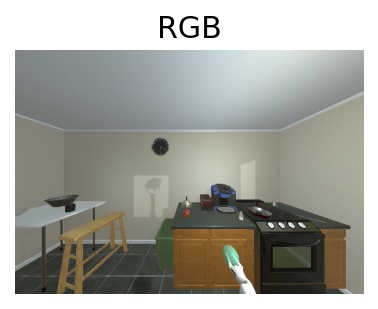

In [7]:
floor_index = random.randint(0, 30)
floor_index = 11

controller = Controller(
    agentMode="arm",
    massThreshold=None,
    visibilityDistance=0.50,
    scene=f"FloorPlan{floor_index}",

    # step sizes
    gridSize=0.25,
    
    # image modalities
    renderInstanceSegmentation=False,
    renderDepthImage=False,
    renderSemanticSegmentation=False,
    renderNormalsImage=False,
    
    # camera properties
    width = 600,
    height = 420,
    fieldOfView = 120,
    
    # set seed for reproducibility
    seed=90,
)

plot_frames(controller.last_event)
controller.reset(f"FloorPlan{floor_index}");

## Set Configs

In [8]:
is_cuda = torch.cuda.is_available()

if is_cuda: device = torch.device('cuda')
else: device = torch.device('cpu')

STATE_DIM = SCREEN_WIDTH = SCREEN_HEIGHT = 224 # Resnet's input size

In [9]:
action_space = ["MoveAgent", "RotateAgent", "MoveArm", "MoveArmBase", "LookUp", "LookDown"]

In [10]:
object_name = "apple"

In [11]:
instruction = f"A scene of {object_name} on the table"

In [12]:
instruction

'A scene of red tomato and cabbage on the table'

## Load Model

In [13]:
# Not implemented yet as the policy
ppo_agent = PPOAgent(state_dim=STATE_DIM, action_dim = len(action_space))

## Run Environment

Action: w, Similarity=0.1575


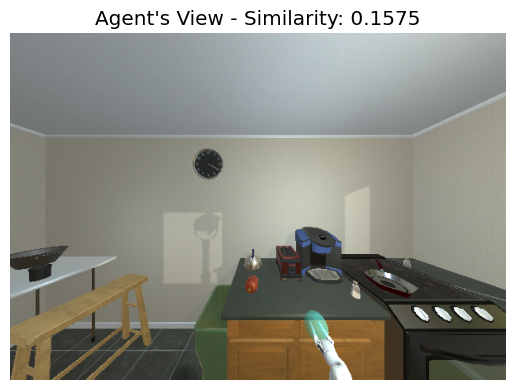

Action: r, Similarity=0.1476


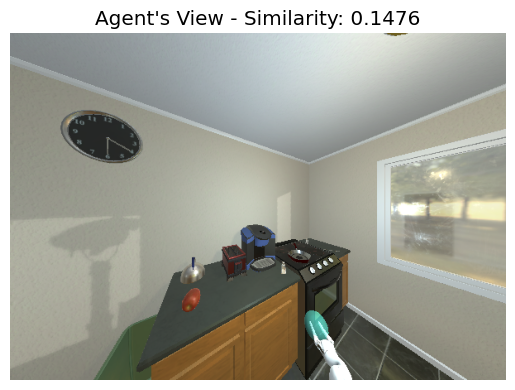

Action: r, Similarity=0.1501


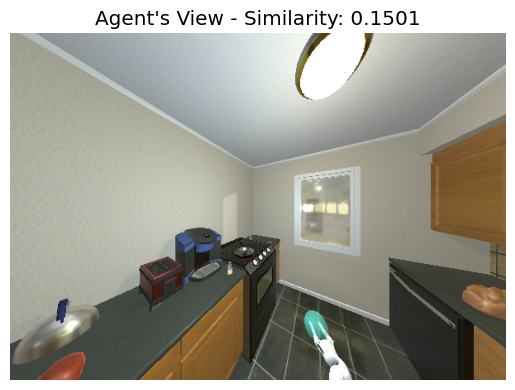

Action: r, Similarity=0.1528


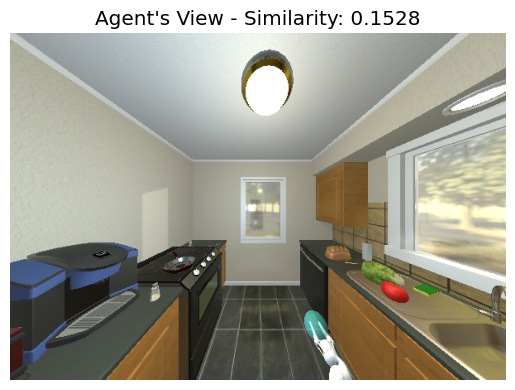

Action: w, Similarity=0.1482


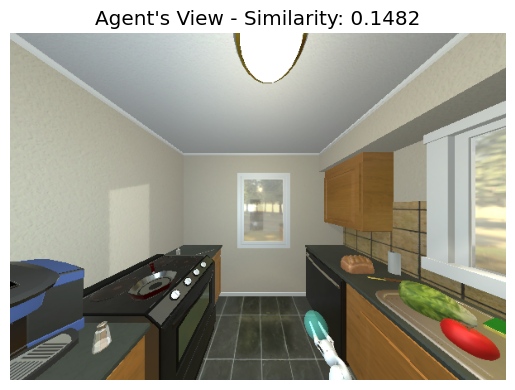

Action: r, Similarity=0.1530


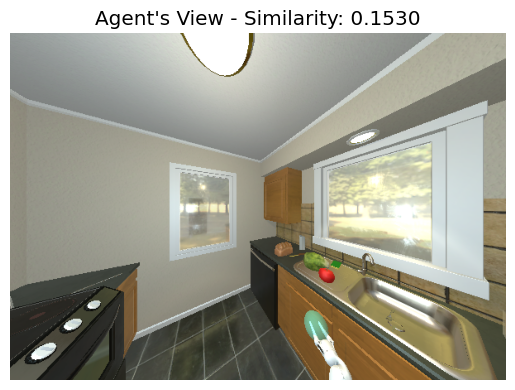

Action: w, Similarity=0.1724


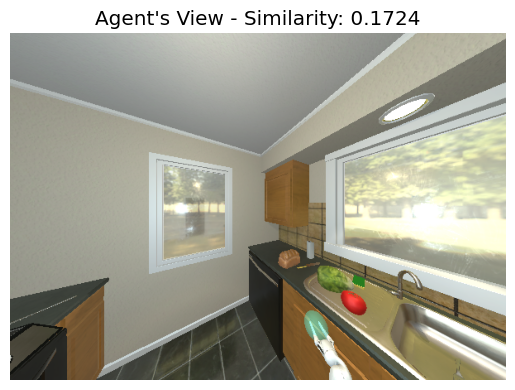

Action: r, Similarity=0.1504


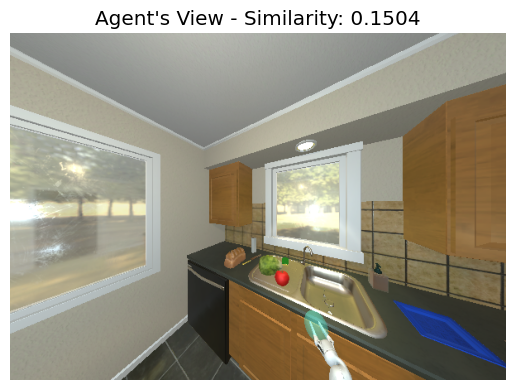

Action: w, Similarity=0.1584


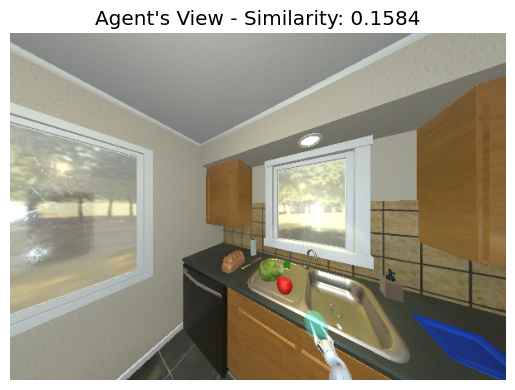

Action: r, Similarity=0.1769


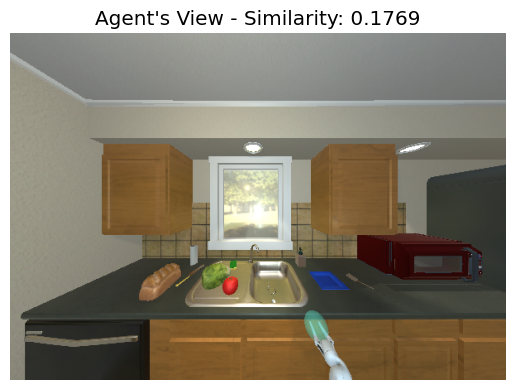

Action: a, Similarity=0.1637


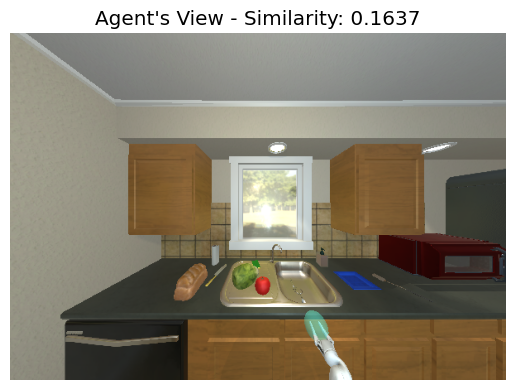

Action: w, Similarity=0.1599


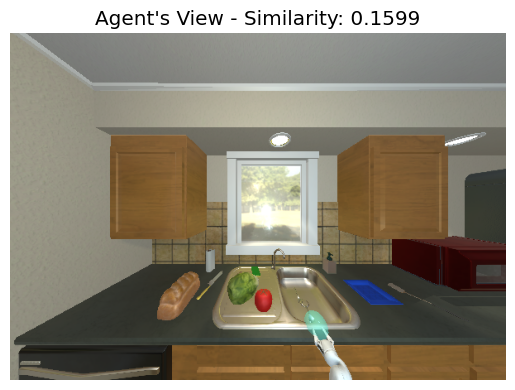

Action: w, Similarity=0.1599


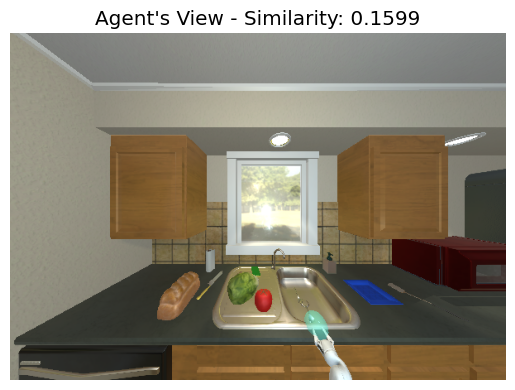

Action: w, Similarity=0.1599


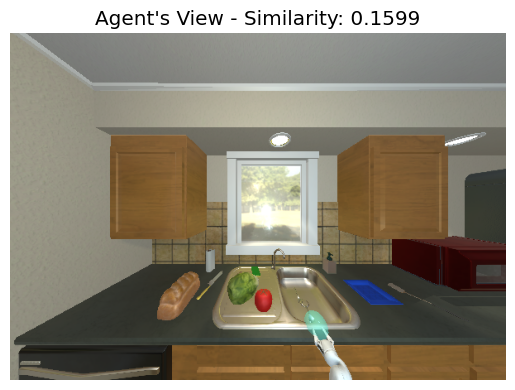

Action: w, Similarity=0.1599


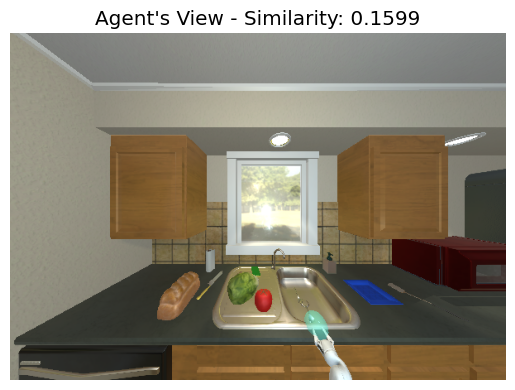

KeyboardInterrupt: 

In [14]:
# random_policy(controller, action_space, instruction, num_steps=10)
# train_ppo(controller, ppo_agent, action_space, state_dim, num_episodes=1000, max_timesteps=200)
manual_control_policy(controller, action_space, instruction)
controller.stop()